# In questo file andiamo a fare il task di clusterizzazione

In [12]:
# for basic mathematics operation 
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "none"


# Adesso vado a caricare il dataset ma solo con le due colonne d'interesse

In [13]:
data = pd.read_csv('DataSet\out.csv')
#display(data.head())

# take only annual income and spending score
x = data.iloc[:, [0,8,9,13]].values

# let's check the shape of x
print(x.shape)


(2190888, 4)


# Devo fare ETL, devo eliminare i valore Nan nel dataset

In [14]:
import os
from scipy import stats
import math

# Cambio della cartella attuale nella cartella in cui si trova il file .py
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

path_cartella = r"\archive\csvs_per_year\csvs_per_year"

path = path_file + path_cartella

c:\Users\pc\Desktop\Università\Data science\Progetti\ProgettoPython\DataScience2Project


# Per comodità carico direttamente tutti i file

In [34]:
# Vado a caricare tutte le tabelle del mio dataset

madrid2008 = pd.read_csv(path+"\madrid_2008.csv")
madrid2009 = pd.read_csv(path+"\madrid_2009.csv")
madrid2010 = pd.read_csv(path+"\madrid_2010.csv")
madrid2011 = pd.read_csv(path+"\madrid_2011.csv")
madrid2012 = pd.read_csv(path+"\madrid_2012.csv")
madrid2013 = pd.read_csv(path+"\madrid_2013.csv")
madrid2014 = pd.read_csv(path+"\madrid_2014.csv")
madrid2015 = pd.read_csv(path+"\madrid_2015.csv")
madrid2016 = pd.read_csv(path+"\madrid_2016.csv")
madrid2017 = pd.read_csv(path+"\madrid_2017.csv")
madrid2018 = pd.read_csv(path+"\madrid_2018.csv")
station = pd.read_csv('DataSet\stations.csv')
out = pd.read_csv('DataSet\out.csv')
display(out.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190888 entries, 0 to 2190887
Data columns (total 14 columns):
 #   Column   Dtype  
---  ------   -----  
 0   date     object 
 1   BEN      float64
 2   CO       float64
 3   EBE      float64
 4   NMHC     float64
 5   NO       float64
 6   NO_2     float64
 7   O_3      float64
 8   PM10     float64
 9   PM25     float64
 10  SO_2     float64
 11  TCH      float64
 12  TOL      float64
 13  station  int64  
dtypes: float64(12), int64(1), object(1)
memory usage: 234.0+ MB


None

# Per ogni anno e per ogni stazione calcolo la media troncata e la sostituisco ai valori Nan

In [48]:
full = pd.Series()
time=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
for d in time:
    fullYear = pd.Series()
    madrid = pd.read_csv(path+"\madrid_"+d+".csv")
    stazioni = madrid['station'].unique()
    #display(stazioni)
    for y in stazioni:
        onlyOne=madrid[madrid["station"].astype(str).str.contains(str(y))]
        copy = onlyOne.copy()
        newValue= stats.trim_mean(copy['PM10'].dropna().values,0.05) # La faccio qui
        onlyOne = onlyOne['PM10'].fillna(newValue) # Questo mette la media al posto dei nulli
        fullYear = pd.concat([fullYear,onlyOne])
    if(fullYear.isna().sum() != 0):
        copy = fullYear.copy()
        newValue= stats.trim_mean(copy.dropna().values,0.05)
        fullYear = fullYear.fillna(newValue)
        full = pd.concat([full,fullYear])
    else:
        full = pd.concat([full,fullYear])

df = full.to_frame(name='PM10')
display(df.isna().sum())
display(df.count())

display(df.head(10))

C:\Users\pc\AppData\Local\Temp\ipykernel_10476\3578172549.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_10476\3578172549.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  fullYear = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_10476\3578172549.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  fullYear = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_10476\3578172549.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  fullYear = pd.Series()
C:\U

PM10    0
dtype: int64

PM10    2190888
dtype: int64

,PM10
0,16.889999
26,23.740000
52,21.379999
78,8.330000
104,21.520000
130,12.600000
156,10.920000
182,13.130000
208,10.710000
234,8.740000


# Lavoro sul secondo eleemento

In [49]:
full = pd.Series()
time=['2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018']
for d in time:
    fullYear = pd.Series()
    madrid = pd.read_csv(path+"\madrid_"+d+".csv")
    stazioni = madrid['station'].unique()
    #display(stazioni)
    for y in stazioni:
        onlyOne=madrid[madrid["station"].astype(str).str.contains(str(y))]
        copy = onlyOne.copy()
        newValue= stats.trim_mean(copy['PM25'].dropna().values,0.05) # La faccio qui
        onlyOne = onlyOne['PM25'].fillna(newValue) # Questo mette la media al posto dei nulli
        fullYear = pd.concat([fullYear,onlyOne])
    if(fullYear.isna().sum() != 0):
        copy = fullYear.copy()
        newValue= stats.trim_mean(copy.dropna().values,0.05)
        fullYear = fullYear.fillna(newValue)
        full = pd.concat([full,fullYear])
    else:
        full = pd.concat([full,fullYear])

df2 = full.to_frame(name='PM25')
display(df2.isna().sum())
display(df2.count())

display(df2.head(10))

C:\Users\pc\AppData\Local\Temp\ipykernel_10476\1046151320.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  full = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_10476\1046151320.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  fullYear = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_10476\1046151320.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  fullYear = pd.Series()
C:\Users\pc\AppData\Local\Temp\ipykernel_10476\1046151320.py:4: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  fullYear = pd.Series()
C:\U

PM25    0
dtype: int64

PM25    2190888
dtype: int64

,PM25
0,10.40
26,13.69
52,12.16
78,5.69
104,12.93
130,7.37
156,7.46
182,8.87
208,6.66
234,4.79


# Qui vado a fare le operazioni per calcolare il K migliore

In [65]:
distortions = []
x = pd.DataFrame(data={'PM10':df['PM10'],'PM25':df2['PM25']})

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    distortions.append(km.inertia_)

# Stampo il grafico

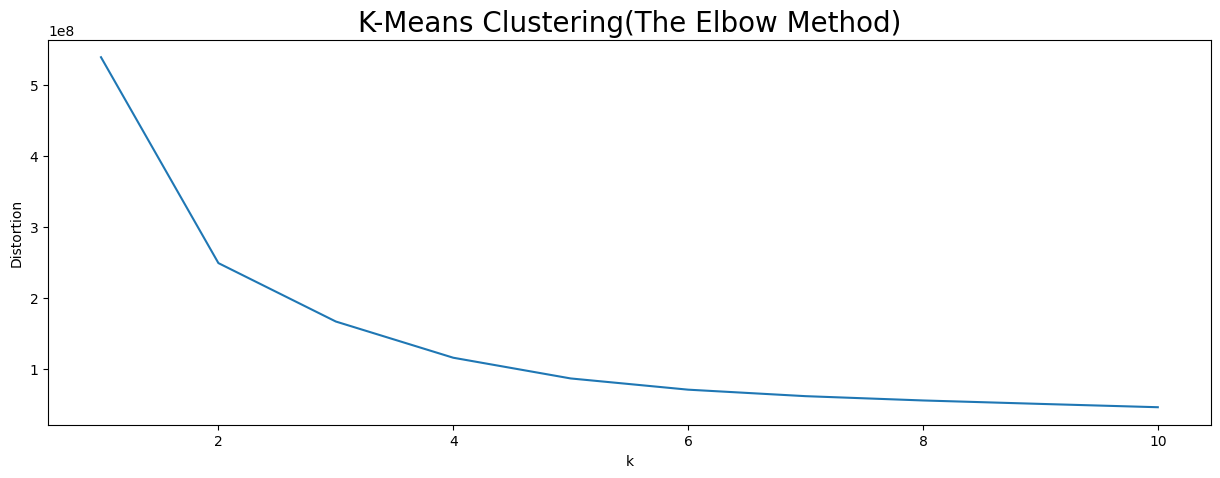

In [66]:
plt.figure(figsize=(15,5))
plt.plot(range(1, 11), distortions)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.show()